# Telco Customer Churn Prediction

### 1. Introduction
In the current competitive business landscape, customer retention is of paramount importance. High customer churn rates result in substantial revenue loss and increased costs for acquiring new customers. To mitigate this issue, our company proposes the development of a machine learning model to predict customer churn accurately. Early identification of at-risk customers will enable the implementation of targeted retention strategies, such as personalized marketing and special offers. This approach aims to reduce churn rates, enhance customer satisfaction, and improve overall profitability.

#### 1.1 Business Problem

- A machine learning model is projected to be developed for the prediction of customers likely to terminate their association with the company.


#### 1.2 Dataset Story

The Telco customer churn data provides information about a fictional telecommunications company that offered landline phone and Internet services to 7,043 customers in California during the third quarter. This dataset indicates which customers discontinued services, remained with the company, or signed up for new services.

#### 1.2 Dataset Variables

- **CustomerId -** Unique identifier for each customer account
- **Gender -** Customer's gender
- **SeniorCitizen -** Binary indicator for senior citizen status (1 for yes, 0 for no)
- **Partner -** Presence of a partner (Yes or No)
- **Dependents -** Presence of dependents (Yes or No)
- **Tenure -** Duration of the customer's association with the company (in months)
- **PhoneService -** Phone service subscription (Yes or No)
- **MultipleLines -** Presence of multiple lines (Yes, No, or No phone service)
- **InternetService -** Type of internet service provider (DSL, Fiber optic, or No)
- **OnlineSecurity -** Presence of online security (Yes, No, or No internet service)
- **OnlineBackup -** Presence of online backup (Yes, No, or No internet service)
- **DeviceProtection -** Presence of device protection (Yes, No, or No internet service)
- **TechSupport -** Technical support subscription (Yes, No, or No internet service)
- **StreamingTV -** Streaming TV subscription (Yes, No, or No internet service)
- **StreamingMovies -** Streaming movies subscription (Yes, No, or No internet service)
- **Contract -** Duration of the customer's contract (Month-to-month, One year, Two year)
- **PaperlessBilling -** Paperless billing preference (Yes or No)
- **PaymentMethod -** Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges -** Monthly billed amount
- **TotalCharges -** Cumulative billed amount
- **Churn -** Churn status, indicating if the customer terminated services (Yes or No)

### 2. Exploratory Data Analysis (EDA)

In [107]:
## Import necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
!pip install lightgbm
!pip install catboost


from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [108]:
## load the dataset

df = pd.read_csv('Telco-Customer-Churn.csv')

In [109]:
# # Display information about the dataset using  function

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)

check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 21, dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines Inter

**CAPTURING NUMERICAL AND CATEGORICAL VARIABLES**

In [110]:
## The grab_col_names function is designed to identify and categorize the columns in a given DataFrame into three distinct types: 
## categorical, numerical, and cardinal categorical variables. 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numerical, and cardinal categorical variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
            The dataframe from which to get the variable names
        cat_th: int, optional
            Class threshold for numerical but categorical variables
        car_th: int, optional
            Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
            List of categorical variables
        num_cols: list
            List of numerical variables
        cat_but_car: list
            List of cardinal categorical variables

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
        The sum of the returned 3 lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # Identifying categorical variables (variables of type 'object')
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Identifying numerical but categorical variables (with unique values less than cat_th and not of type 'object')
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Identifying cardinal categorical variables (with unique values greater than car_th and of type 'object')
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Adding numerical but categorical variables to the list of categorical variables
    cat_cols = cat_cols + num_but_cat
    
    # Removing cardinal categorical variables from the list of categorical variables
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identifying numerical variables (variables not of type 'object')
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    # Removing numerical but categorical variables from the list of numerical variables
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Printing summary information about the dataset
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    # Returning the lists of categorical, numerical, and cardinal categorical variables
    return cat_cols, num_cols, cat_but_car

In [111]:
# Execute the function to identify and separate variable types.

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [112]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [113]:
num_cols

['tenure', 'MonthlyCharges']

In [114]:
cat_but_car

['customerID', 'TotalCharges']

#### 2.1. Data Cleaning and Preprocessing

The TotalCharges column appears not to be a numerical column as expected.

In [115]:
# Convert `TotalCharges` column to numeric
# 'coerce': If a value cannot be converted to numeric (e.g., spaces or non-numeric characters), it will be set as NaN (Not a Number).

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [116]:
# Execute the function to identify and separate variable types.

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [117]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

#### 2.1.1 )Analyzing of Missing Values 

In [118]:
# Identify columns with null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
                    ..
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Length: 21, dtype: int64

In [119]:
# Display rows where `TotalCharges` is NaN

df[df['TotalCharges'].isnull()][['tenure', 'TotalCharges']]

,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


In our observation, new customers with a Tenure value of 0 are currently displaying no TotalCharges, which signifies that they have not yet settled their bills. Therefore, their TotalCharges should be replaced with 0.

In [120]:
# Fill NaN values with 0 for new customers

df['TotalCharges'].fillna(0, inplace=True)


In [121]:
def missing_values_table(dataframe, na_name=False):
    # Identify columns with missing values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # Calculate the number of missing values in each column
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Calculate the percentage of missing values in each column
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Combine the number of missing values and their ratios into a DataFrame
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    # Print the DataFrame showing the count and percentage of missing values
    print(missing_df, end="\n")
    
    # If na_name is True, return the list of columns with missing values
    if na_name:
        return na_columns

In [122]:
# Execute the function to display the missing values table.

na_columns = missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


#### 2.1.2 ) Analyzing of Outiers

In [123]:
# The outlier_thresholds function is used to calculate the lower and upper limits for identifying outliers in a 
# specified column of a pandas DataFrame based on the interquartile range (IQR) method. 

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# The check_outlier function is designed to determine whether there are any outliers in a specified column of a pandas DataFrame.
def check_outlier(dataframe, col_name):
    # Calculate the lower and upper limits for outliers in the specified column using the outlier_thresholds function
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    # Check if there are any values in the specified column that are outside the calculated limits
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    # If there is at least one value outside the limits, return True
    else:
    # If there are no values outside the limits, return False
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    # Calculate the lower and upper limits for outliers in the specified variable using the outlier_thresholds function with the given quantiles (q1 and q3)
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    # Replace values in the specified variable that are below the lower limit with the lower limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [124]:
for col in num_cols:
    print(col,check_outlier(df,col))

tenure False
MonthlyCharges False
TotalCharges False


#### 2.1.3 ) Analysis of Categorical Variables

In [125]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [126]:
def cat_summary(dataframe, cat_cols, plot=False):
    """
    Displays value counts and ratios of categorical columns in a dataframe.
    
    Parameters:
    ----------
    dataframe : DataFrame
        The dataframe containing the categorical columns.
    cat_cols : list
        List of categorical column names to analyze.
    plot : bool, optional
        Whether to display count plots for each categorical column. Default is False.

    Returns:
    -------
    None
    """

    for col_name in cat_cols:
        # Print value counts and ratios
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            # Plot countplot if plot=True
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show()

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


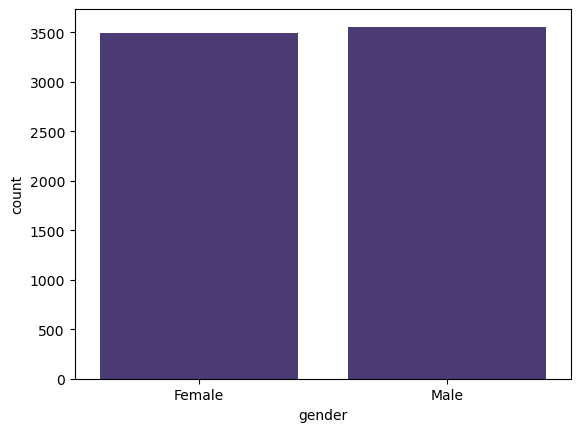

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################


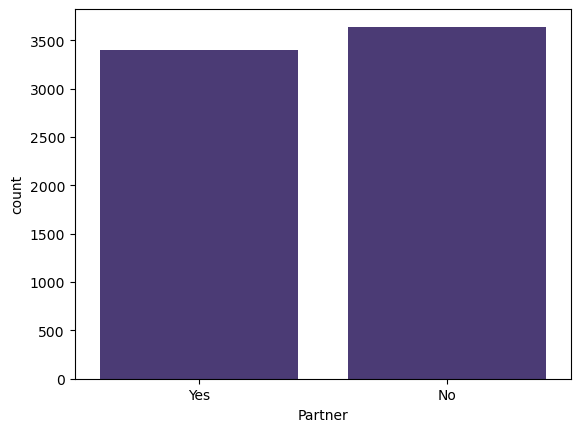

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################


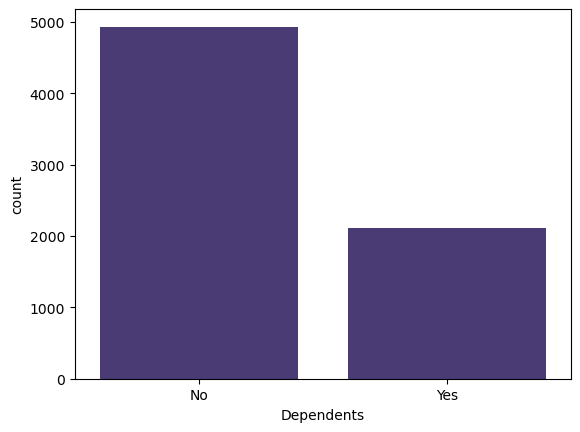

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################


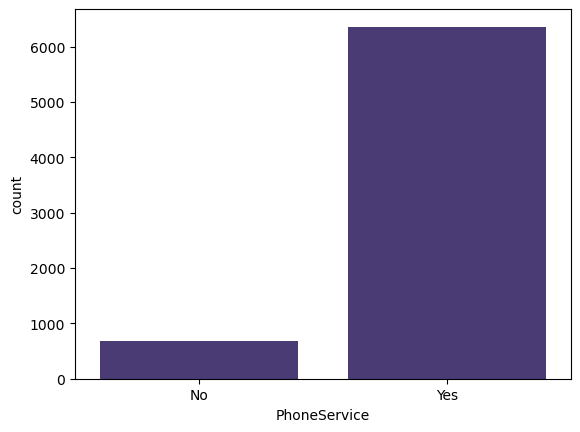

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


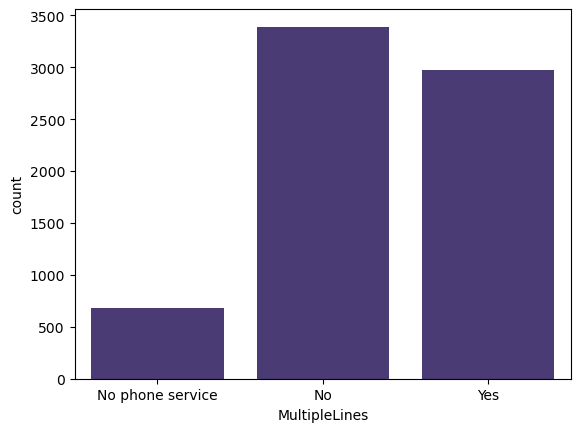

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########################################


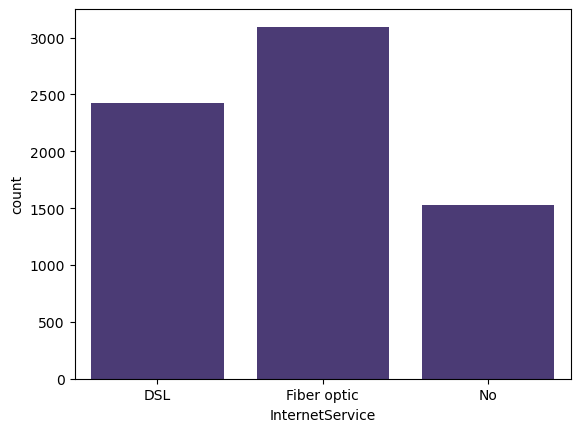

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


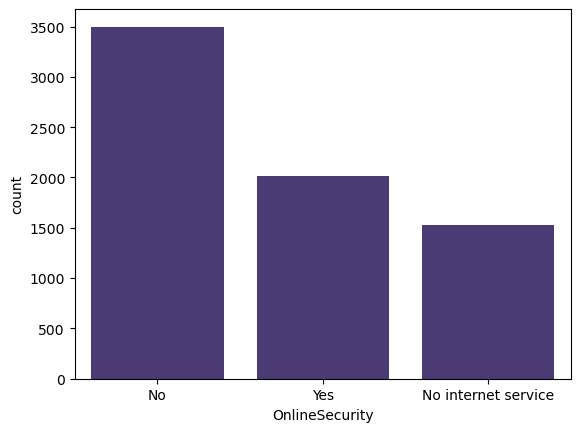

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


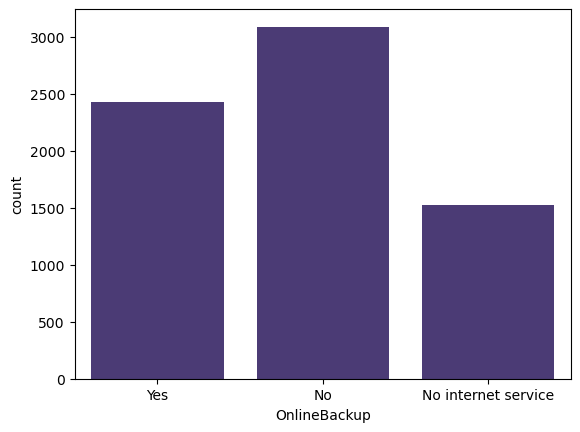

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


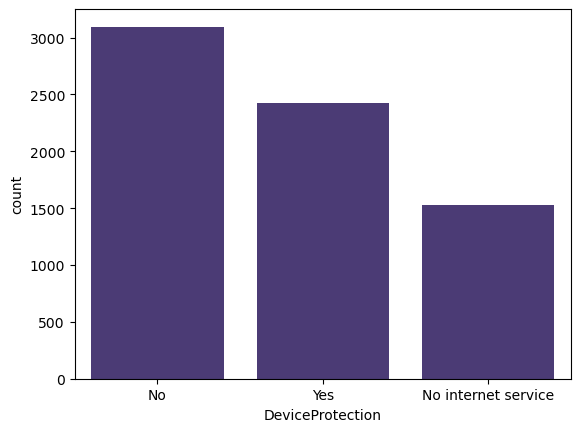

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


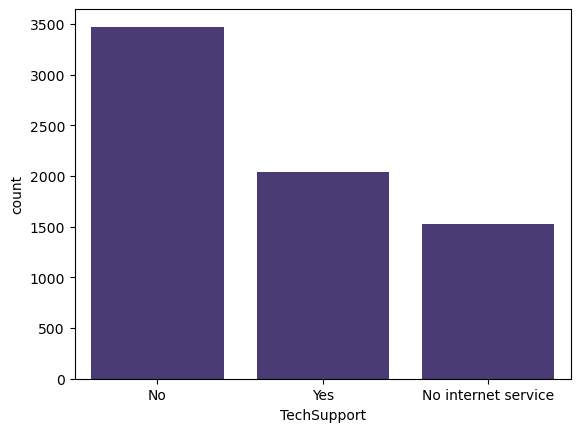

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


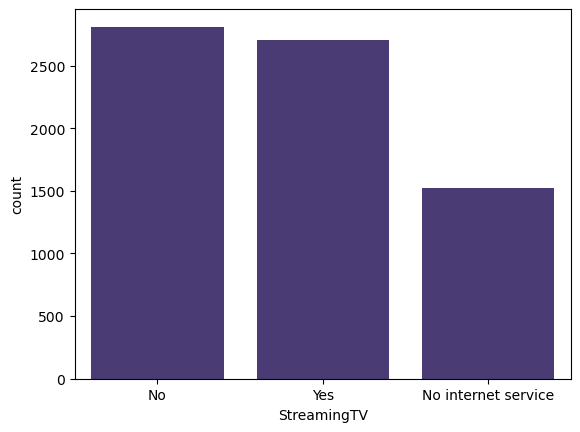

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


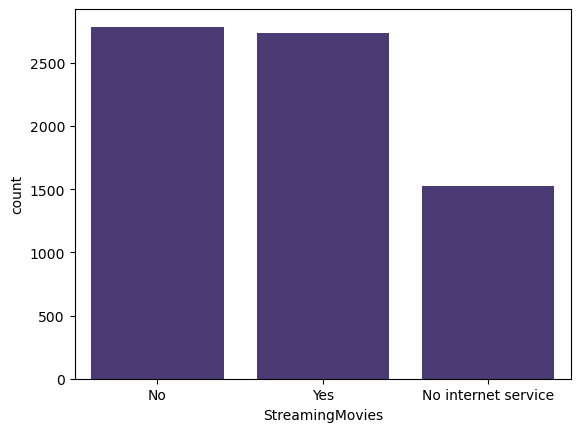

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


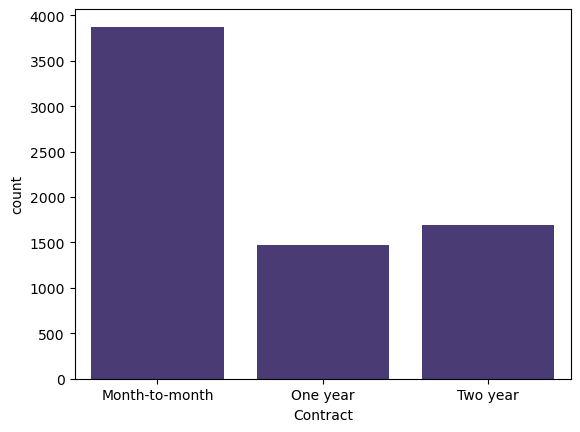

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
##########################################


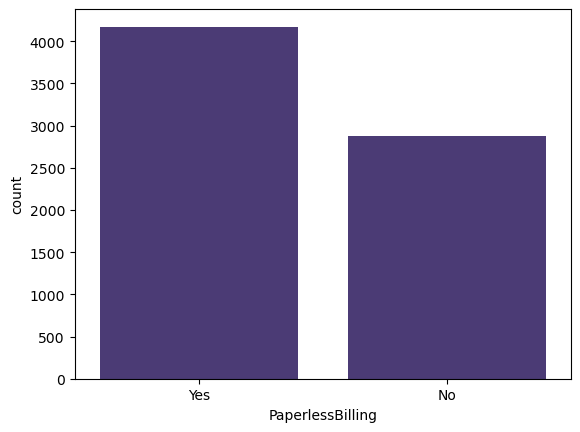

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


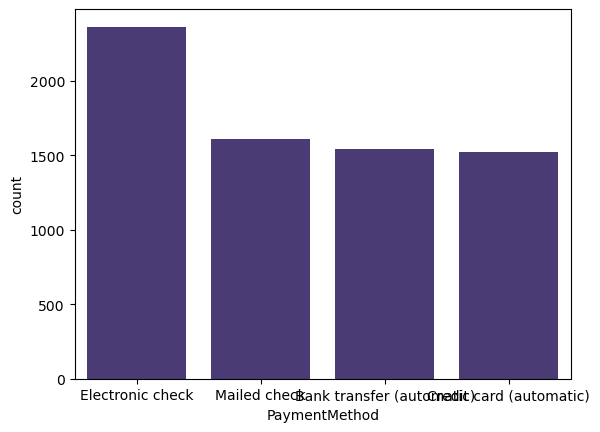

       Churn  Ratio
Churn              
No      5174 73.463
Yes     1869 26.537
##########################################


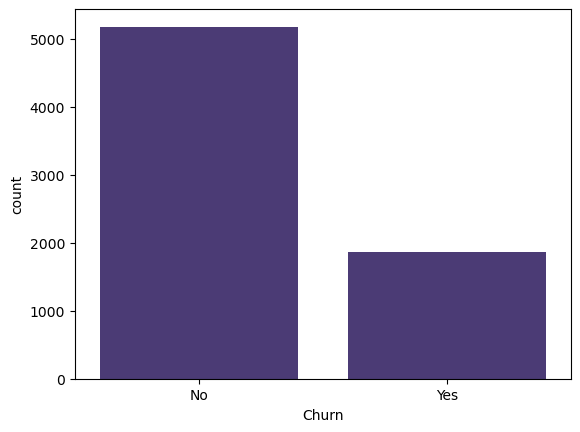

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


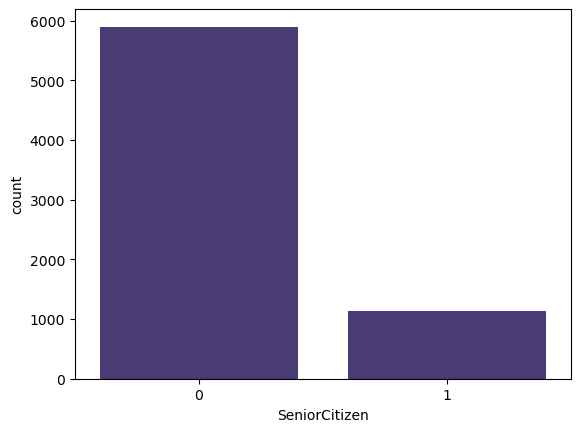

In [127]:
#Summary of Categoricals columns

cat_summary(df, cat_cols, True)

#### 2.1.4 ) Analysis of Numerical Variables

In [128]:
def num_summary(dataframe, col, groupby=None, log_scale=False, ax=None):
    """
    Plot histogram(s) for a column in a dataframe, optionally grouped by another column.

    Parameters:
    ----------
    dataframe : DataFrame
        The dataframe containing the data to plot.
    col : str
        Name of the column for which to plot the histogram.
    groupby : str or None, optional
        Name of the column by which to group the data. Default is None.
    log_scale : bool, optional
        Whether to use a logarithmic scale on the y-axis. Default is False.
    ax : matplotlib Axes object, optional
        Axes object to plot on. If None, a new figure and axes will be created. Default is None.

    Returns:
    -------
    None
    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col].describe(quantiles).T)

    
    # Set up the figure and axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set seaborn color palette for colorblind accessibility and distinct colors
    sns.set_palette(sns.color_palette("viridis"))
    
    # Plot histogram with or without grouping
    if groupby is not None:
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, hue=groupby, palette="viridis", ax=ax)
    else:
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, color='mediumpurple', ax=ax)
    
    # Set plot labels and title
    ax.set_title(f'Histogram for {col}', fontsize=16, weight='bold')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    
    # Set y-axis to log scale if log_scale is True
    if log_scale:
        ax.set_yscale('log')
    
    # Enhance grid and ticks for better readability
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', labelsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64
count   7043.000
mean    2279.734
std     2266.794
min        0.000
5%        48.600
10%       83.470
20%      265.320
30%      548.400
40%      939.780
50%     1394.550
60%     2043.710
70%     3132.750
80%     4471.440
90%     5973.690
95%     6921.025
99%     8039.256
max     8684.800
Name: TotalCharges, dtype: float64


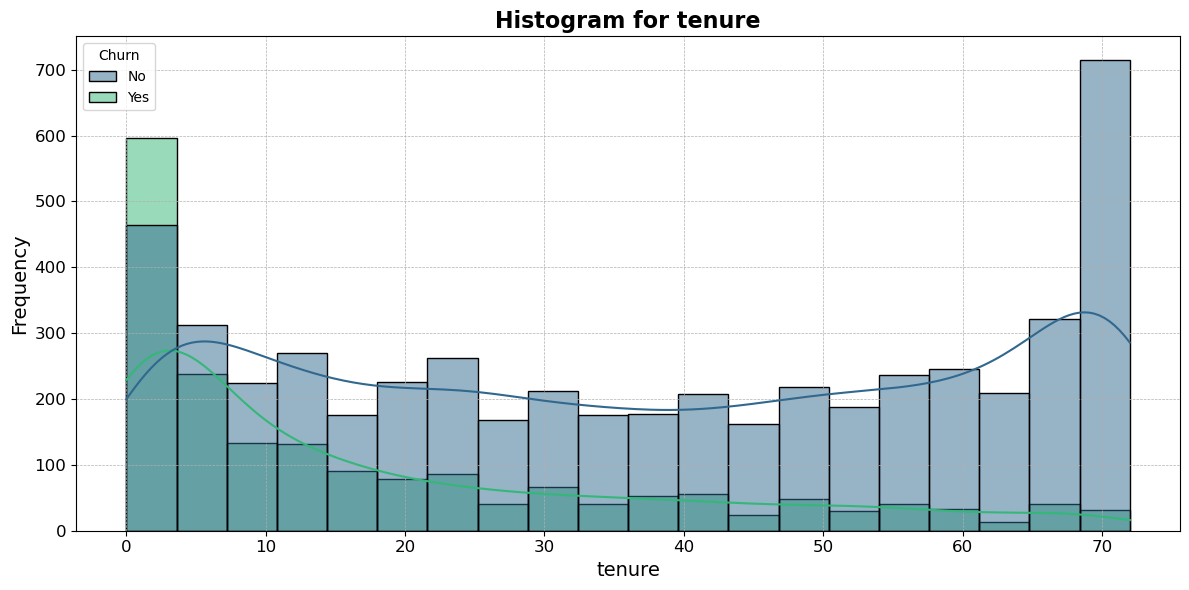

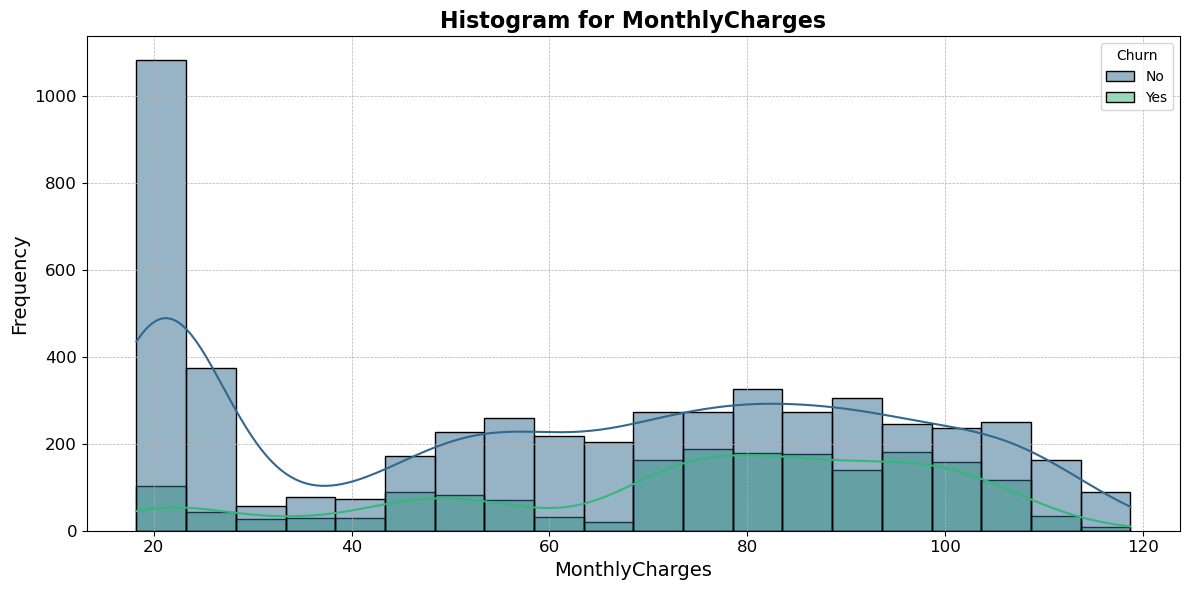

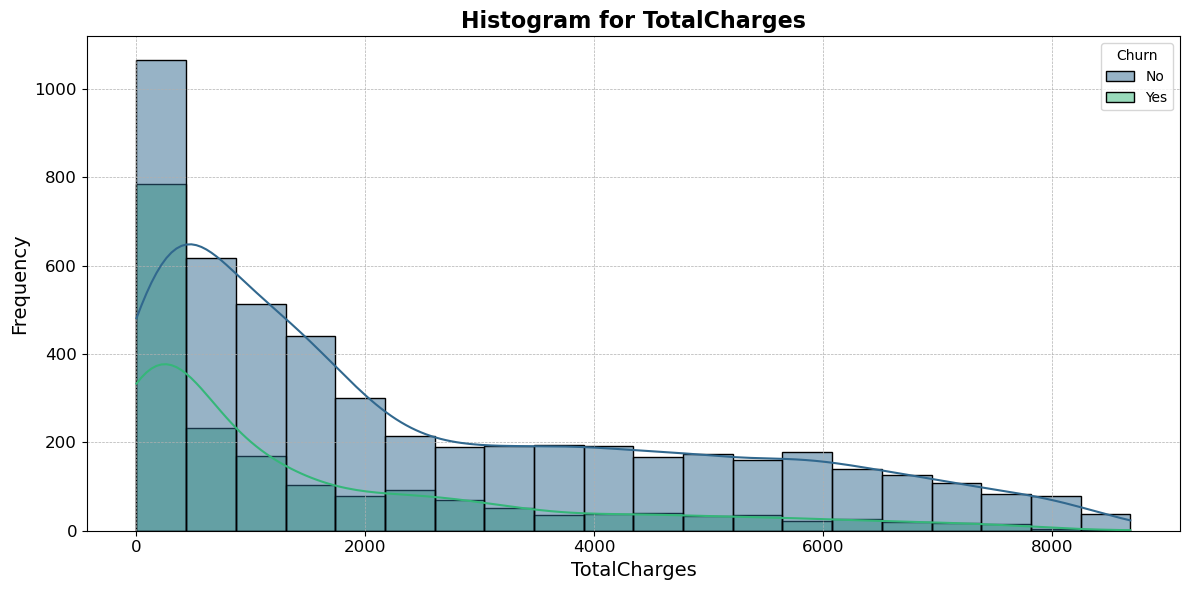

In [129]:
#Summary of Numericals columns

for col in num_cols:
    num_summary(df, col, groupby="Churn")

#### 2.1.5 )Analysis of Numerical Variables by Target

In [130]:
 # This function calculates and prints the mean of a numerical column, grouped by the target variable.

def target_summary_with_num(dataframe, target, numerical_col):
    
    # Group the dataframe by the target variable and calculate the mean of the numerical column for each group.
    # The .agg() method is used to apply the mean function to the specified numerical column.
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Iterate over each numerical column in the list of numerical columns.
for col in num_cols:
    # Call the target_summary_with_num function for each numerical column to print the mean values grouped by the target.
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
No     37.570
Yes    17.979


       MonthlyCharges
Churn                
No             61.265
Yes            74.441


       TotalCharges
Churn              
No         2549.911
Yes        1531.796




#### 2.1.6 )Correlation Analysis

In [131]:
# Display the correlation matrix for numerical variables.

df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


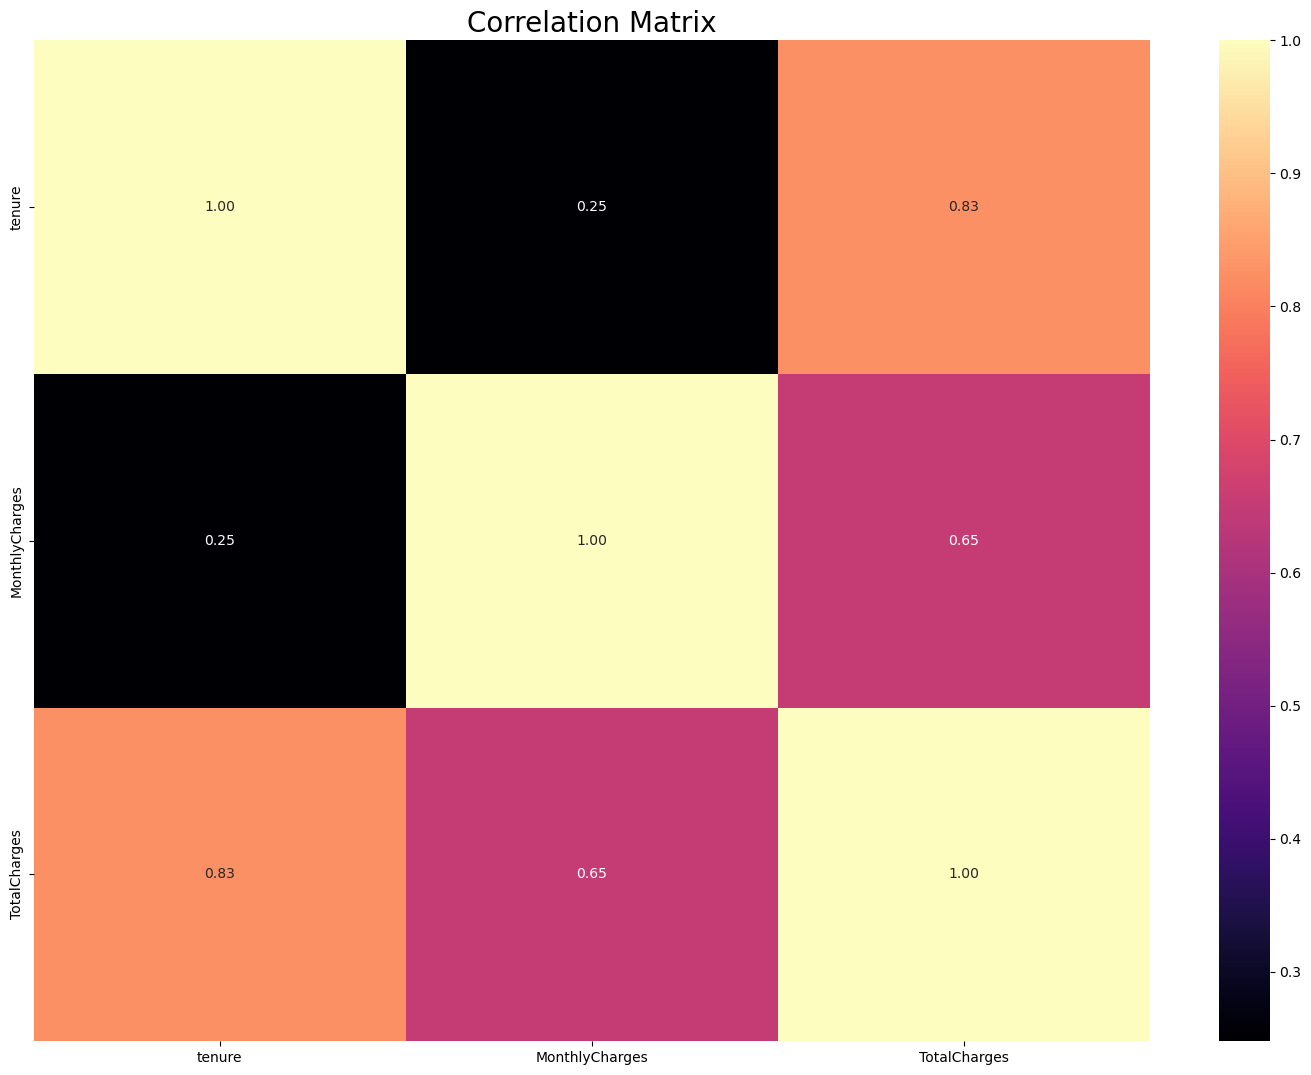

In [132]:
# Plot the correlation matrix.

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [133]:
# Convert 'Churn' column to numeric (1 for 'Yes', 0 for 'No')

df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


#### 2.1.7 ) FEATURE EXTRACTION

In [134]:
# Creating and grouping the number of years a customer has spent 

df.loc[(df["tenure"] >= 0) & (df["tenure"] <= 12), "NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 36), "NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"] > 36) & (df["tenure"] <= 48), "NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"] > 48) & (df["tenure"] <= 60), "NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"] > 60) & (df["tenure"] <= 72), "NEW_TENURE_YEAR"] = "5-6 Year"

In [135]:
## Creating categories based on customers' commitment durations

df["COMMITMENT_CATEGORY"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

In [136]:
# Segment customers who are considered individuals

df['INDIVIDUALS_CATEGORY'] = (df['Partner'] == 'No') & (df['Dependents'] == 'No')

In [137]:
# Identifying customers who do not have any of the support, backup,security or protection services.

df["NO_PROTECTION_PLAN"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (
        x["TechSupport"] != "Yes") or (x["OnlineSecurity"] != "Yes")else 0, axis=1)

In [138]:
# Identifying young, not engaged (monthly contracts) customers potentially at higher risk of churning.

df["NEW_AT_RISK_YOUNG_CUSTOMERS"] = df.apply(lambda x: 1 if (x["COMMITMENT_CATEGORY"] == 0) and (x["SeniorCitizen"] == 0) else 0,
                                       axis=1)

In [139]:
# Create a new column "AutoPaymentFlag" to indicate customers using automatic payment methods

df["FLAG_AUTO_PAYMENT"] = df["PaymentMethod"].apply(
    lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

In [140]:
# Create a new column "ChargePlan" to categorize customers based on their monthly charges

df['CHARGE_PLAN'] = pd.qcut(df['MonthlyCharges'], 3, labels=['Basic', 'Standard', 'Premium'])

In [141]:
# Calculating the average monthly charges.

df["NEW_AVG_MONTLY_CHARGES"] = df["TotalCharges"] / (df["tenure"] + 1)

In [142]:
# Create a new column "NEW_Increase" to store the ratio of average charges to current charges

df["RATE_INCREASE"] = df["NEW_AVG_MONTLY_CHARGES"] / df["MonthlyCharges"]

In [143]:
# Counting the total number of services each customer has subscribed to.

df['NEW_TOTAL_SERVICES'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [144]:
# Calculating the average service fee per subscribed service.

df["AVG_SERVICE_FEE"] = df["MonthlyCharges"] / (df['NEW_TOTAL_SERVICES'] + 1)

In [145]:
# Displaying the first few rows of the updated dataframe and its new size after feature extraction.

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,COMMITMENT_CATEGORY,INDIVIDUALS_CATEGORY,NO_PROTECTION_PLAN,NEW_AT_RISK_YOUNG_CUSTOMERS,FLAG_AUTO_PAYMENT,CHARGE_PLAN,NEW_AVG_MONTLY_CHARGES,RATE_INCREASE,NEW_TOTAL_SERVICES,AVG_SERVICE_FEE
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,False,1,1,0,Basic,14.925,0.500,1,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,True,1,0,0,Standard,53.986,0.948,3,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,True,1,1,0,Standard,36.050,0.669,3,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,True,1,0,1,Basic,40.016,0.946,3,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,True,1,1,0,Standard,50.550,0.715,1,35.350


In [146]:
df.shape

(7043, 32)

#### 3. ENCODING

In [147]:
# Execute the function to identify and separate variable types.

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 32
cat_cols: 25
num_cols: 6
cat_but_car: 1
num_but_cat: 9


#### 3.1. Label Encoding

In [148]:
# Initialize the LabelEncoder

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

# Identifying binary categorical columns for label encoding.
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]


for col in binary_cols:
    df = label_encoder(df, col)

In [149]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,COMMITMENT_CATEGORY,INDIVIDUALS_CATEGORY,NO_PROTECTION_PLAN,NEW_AT_RISK_YOUNG_CUSTOMERS,FLAG_AUTO_PAYMENT,CHARGE_PLAN,NEW_AVG_MONTLY_CHARGES,RATE_INCREASE,NEW_TOTAL_SERVICES,AVG_SERVICE_FEE
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0-1 Year,0,False,1,1,0,Basic,14.925,0.500,1,14.925
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,2-3 Year,1,True,1,0,0,Standard,53.986,0.948,3,14.238
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,0-1 Year,0,True,1,1,0,Standard,36.050,0.669,3,13.463
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,True,1,0,1,Basic,40.016,0.946,3,10.575
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,0-1 Year,0,True,1,1,0,Standard,50.550,0.715,1,35.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.800,1990.500,0,1-2 Year,1,False,1,0,0,Premium,79.620,0.939,6,12.114
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.200,7362.900,0,5-6 Year,1,False,1,0,1,Premium,100.862,0.977,5,17.200
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.600,346.450,0,0-1 Year,0,False,1,1,0,Basic,28.871,0.975,1,14.800
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.400,306.600,1,0-1 Year,0,False,1,0,0,Standard,61.320,0.824,1,37.200


#### 3.2. One-Hot Encoding İşlemi

In [150]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'Churn',
 'COMMITMENT_CATEGORY',
 'INDIVIDUALS_CATEGORY',
 'NO_PROTECTION_PLAN',
 'NEW_AT_RISK_YOUNG_CUSTOMERS',
 'FLAG_AUTO_PAYMENT',
 'CHARGE_PLAN',
 'NEW_TOTAL_SERVICES']

In [151]:
# Updating the list of categorical columns excluding the binary ones and the target variable 'Churn'.

cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]

In [152]:
# Function to apply one-hot encoding to the specified categorical columns.
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [153]:
# Applying one-hot encoding to the dataframe.

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [154]:
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)

#### 3.3 ) Scaling

In [155]:
num_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'NEW_AVG_MONTLY_CHARGES',
 'RATE_INCREASE',
 'AVG_SERVICE_FEE']

In [156]:
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [157]:
df

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_AVG_MONTLY_CHARGES,RATE_INCREASE,AVG_SERVICE_FEE,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,COMMITMENT_CATEGORY_1,INDIVIDUALS_CATEGORY_True,NO_PROTECTION_PLAN_1,NEW_AT_RISK_YOUNG_CUSTOMERS_1,FLAG_AUTO_PAYMENT_1,CHARGE_PLAN_Standard,CHARGE_PLAN_Premium,NEW_TOTAL_SERVICES_1,NEW_TOTAL_SERVICES_2,NEW_TOTAL_SERVICES_3,NEW_TOTAL_SERVICES_4,NEW_TOTAL_SERVICES_5,NEW_TOTAL_SERVICES_6,NEW_TOTAL_SERVICES_7
0,7590-VHVEG,0,1,0,-1.277,0,1,-1.160,-0.993,0,-1.441,-2.584,-0.311,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0.066,1,0,-0.260,-0.172,0,-0.164,0.329,-0.410,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,-1.237,1,1,-0.363,-0.958,1,-0.750,-1.482,-0.522,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,7795-CFOCW,1,0,0,0.514,0,0,-0.747,-0.194,0,-0.621,0.316,-0.939,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,-1.237,1,1,0.197,-0.939,1,-0.276,-1.186,2.636,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,1,-0.341,1,1,0.666,-0.128,0,0.675,0.270,-0.717,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
7039,2234-XADUH,0,1,1,1.614,1,1,1.278,2.243,0,1.369,0.520,0.017,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
7040,4801-JZAZL,0,1,1,-0.870,0,1,-1.169,-0.853,0,-0.985,0.507,-0.329,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
7041,8361-LTMKD,1,1,0,-1.155,1,1,0.320,-0.871,1,0.076,-0.476,2.903,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0


#### 4.)MODELLING

In [158]:
# Define the target variable 'y' and feature set 'X'.

# Drop 'customerID' as it's not a feature

y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)  # Drop 'customerID' as it's not a feature


In [159]:

# Splitting the data into training and test sets % 80-%20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Initialize the model and training the model

models = [('LR', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')), ("LightGBM", LGBMRegressor(verbose=-1))]


for name, regressor in models:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred_exp = np.expm1(y_pred)
    y_test_exp = np.expm1(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    print(f"RMSE: {round(rmse, 4)} ({name})")


RMSE: 0.6529 (LR)
RMSE: 0.7046 (KNN)
RMSE: 0.9135 (CART)
RMSE: 0.6762 (RF)
RMSE: 0.66 (GBM)
RMSE: 0.702 (XGBoost)
RMSE: 0.6712 (LightGBM)


#### 4.1.) Result

In [164]:
# Creating the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")


Accuracy: 0.81
Recall: 0.707
Precision: 0.48
F1: 0.57


Linear Regression Classifier:

The accuracy of the model on the test set is approximately %81, indicating good overall performance.
    
The value of 0.70 indicates that approximately %70 of actual churn customers were correctly identified by the model.

The value of 0.48 indicates that the model correctly identified about %48 of customers predicted as churn as actually churn.

The F1-score of 0.57 indicates balanced performance in terms of both precision and recall.

**Feature importance**

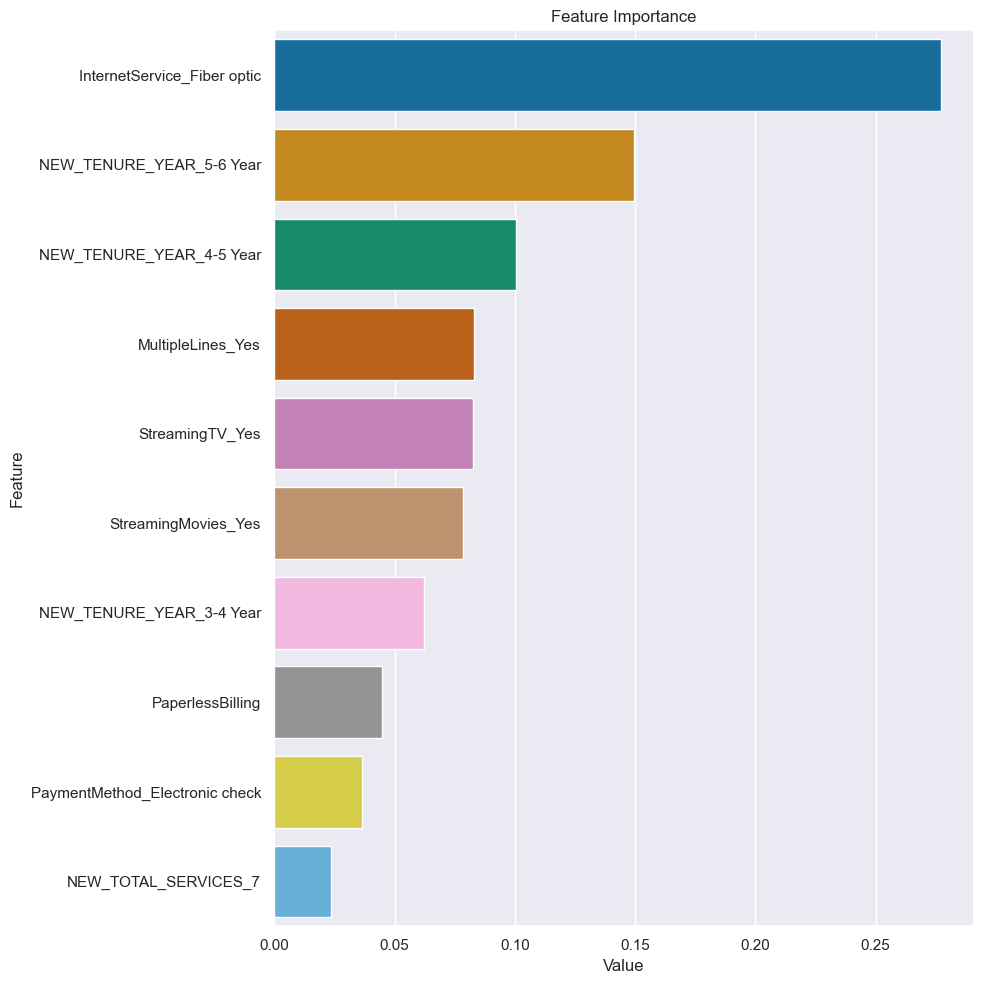

In [169]:
def plot_importance(model, features, num=len(X.columns), save=False):
    # Using model coefficients for linear regression instead of feature importances
    feature_imp = pd.DataFrame({"Value": model.coef_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", palette='colorblind', data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

# Fit the Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)

# Plot feature importance (using coefficients)
plot_importance(model, X, num=10)
